[View in Colaboratory](https://colab.research.google.com/github/bitcointroy/MLsprints/blob/master/Troy_Bradley_Data_Week_Sprint_Challenge.ipynb)

In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd

# Data Preparation Sprint Challenge

Data preparation can be an arduous process with many steps. These following challenges were all gone over in class.

There are six objectives in Data Preparation:

* select
* filter
* treat
* de-duplicate
* concatenate
* transform

There are three objectives in Data Visualization

* Draw an oblique topology
* Pairplot to find clusters
* Plot clusters together

Share with mlsubmissions@lambdaschool.com when finished.

# Select

Load `https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1` and remove any rows that are not data samples.

Print your result and its dimensions.

In [111]:
df = pd.read_csv('https://www.dropbox.com/s/xcqdya9svj04kwc/example4.csv?raw=1', comment = "#")
print(df, '\n')
print('dimensions: ',df.shape)

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo 

dimensions:  (3, 5)


# Filter

Only access the rows or columns of a pandas `DataFrame` that you want.

Load `https://www.dropbox.com/s/xcqdya9svj04kwc/example5.csv?raw=1` for these examples.

In [112]:
df = pd.read_csv('https://www.dropbox.com/s/xcqdya9svj04kwc/example5.csv?raw=1', comment="#")
# Print only the third column
print('3rd column: \n', df["c"], '\n')

# Print columns 'a' and 'message'
print('Columns a and message: \n', df.loc[:,['a','message']], '\n')
# Print the first row
print('First row: \n', df[:1], '\n')

# Print the first and third rows
print('First and third rows: \n', df.iloc[[0,2]])

3rd column: 
 0     3
1     7
2    11
Name: c, dtype: int64 

Columns a and message: 
    a message
0  1   hello
1  5   world
2  9     foo 

First row: 
    a  b  c  d message
0  1  2  3  4   hello 

First and third rows: 
    a   b   c   d message
0  1   2   3   4   hello
2  9  10  11  12     foo


# Treat

Load `https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1` for these examples


In [113]:
df = pd.read_csv('https://www.dropbox.com/s/9cljswede6r25ho/example5.csv?raw=1')
print(df)

# Print the sum of NaN values in each column
allNaN = df.isnull().sum()
print(allNaN)

# Drop all ROWS that contain NaN and print the result
droprows = df.dropna(how='any')
print(droprows)

# Replace all cells containing NaN using ffill
forward = df.fillna(method='ffill')
print(forward)
# ffill can't fill the first item in a column
back = df.fillna(method='bfill')
print(back)
# but bfill can 

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo
something    0
a            0
b            0
c            1
d            0
message      1
dtype: int64
  something  a   b     c   d message
2     three  9  10  11.0  12     foo
  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   3.0   8   world
2     three  9  10  11.0  12     foo
  something  a   b     c   d message
0       one  1   2   3.0   4   world
1       two  5   6  11.0   8   world
2     three  9  10  11.0  12     foo


# De-Duplicate

Load `https://www.dropbox.com/s/5m89vi5qgu4g2cd/duped.csv?raw=1` for the following

In [114]:
df = pd.read_csv('https://www.dropbox.com/s/5m89vi5qgu4g2cd/duped.csv?raw=1')
print(df)

# Print the contents of the dataframe after having dropped all duplicate rows
dedupe = df.drop_duplicates()
print(dedupe)

   a   b   c
0  1   2   3
1  1   1   1
2  1   2   3
3  1   0   3
4  3   3   3
5  3   3   3
6  3   3   1
   a   b   c
0  1   2   3
1  1   1   1
3  1   0   3
4  3   3   3
6  3   3   1


# Concatenate

Merge the Titanic and OKC datasets by `age` using `pd.merge` and the `on` argument.

In [115]:
Titanic = pd.DataFrame({
    'age': [29, 24, 23, 38, 48, 44],
    'name': ['alpha', 'nu', 'gamma', 'psi', 'theta', 'rho']
})
OKC = pd.DataFrame({
    'age': [48, 44, 38, 29, 24, 23],
    'alive': [False, True, False, True, False, True]
})

# Merge and print the result
merged_df = pd.merge(Titanic,OKC,on='age')
print(merged_df)

   age   name  alive
0   29  alpha   True
1   24     nu  False
2   23  gamma   True
3   38    psi  False
4   48  theta  False
5   44    rho   True


# Transform

Use `groupby` to separate the following dataframe by `speed`.

In [116]:
Rockets = pd.DataFrame({
   'speed': ['fast', 'fast', 'fast', 'slow', 'slow'],
   'engine': ['XX9', '24-Bravo', 'Lambda Nu', 'X1', 'XX8'],
   'name': ['Musky', 'NASO', 'COSMO', 'Zucc', 'Dragon egg']
})

# `groupby` and store the result.
grouped_Rockets = Rockets.groupby('speed')
for group in grouped_Rockets:
  print(group[0], len(group[1]))
print('\n')

# Iterate over each result and print it on its own line/s
for group in grouped_Rockets:
  print(group[0], '\n')
  print(grouped_Rockets.get_group(group[0]), '\n')

fast 3
slow 2


fast 

      engine   name speed
0        XX9  Musky  fast
1   24-Bravo   NASO  fast
2  Lambda Nu  COSMO  fast 

slow 

  engine        name speed
3     X1        Zucc  slow
4    XX8  Dragon egg  slow 



# Draw an oblique topology

The Mexican Hat Filter or Laplacian of Gaussian is used for cleaning up noisy 2d data, such as in images. It makes a pretty cool 3d graph.

Plot the filter that is returned by the defined function. The range of the function as defined should be interesting from approximately -1 to 1

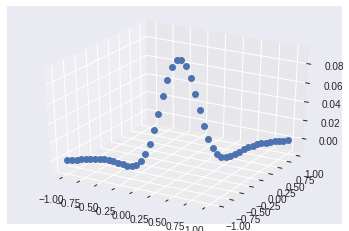

In [117]:
x = np.linspace(-1,1,50)
y = np.linspace(-1,1,50)

def laplacian_of_gaussian(x,y):
    sigma = 0.3
    return 1/np.pi*sigma * (1-0.5*((x**2 + y**2)/sigma**2)) * np.exp(-((x**2+y**2)/(2*sigma**2)))

z = laplacian_of_gaussian(x,y)
  
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'o')


# Pairplot to find clusters

Clusters have a normal shape along each axis. Pairplot the following data and manually print which axes are normal.

Read your data from `https://www.dropbox.com/s/ziqwkm163ih96v0/sprint_challenge_data.csv?raw=1`

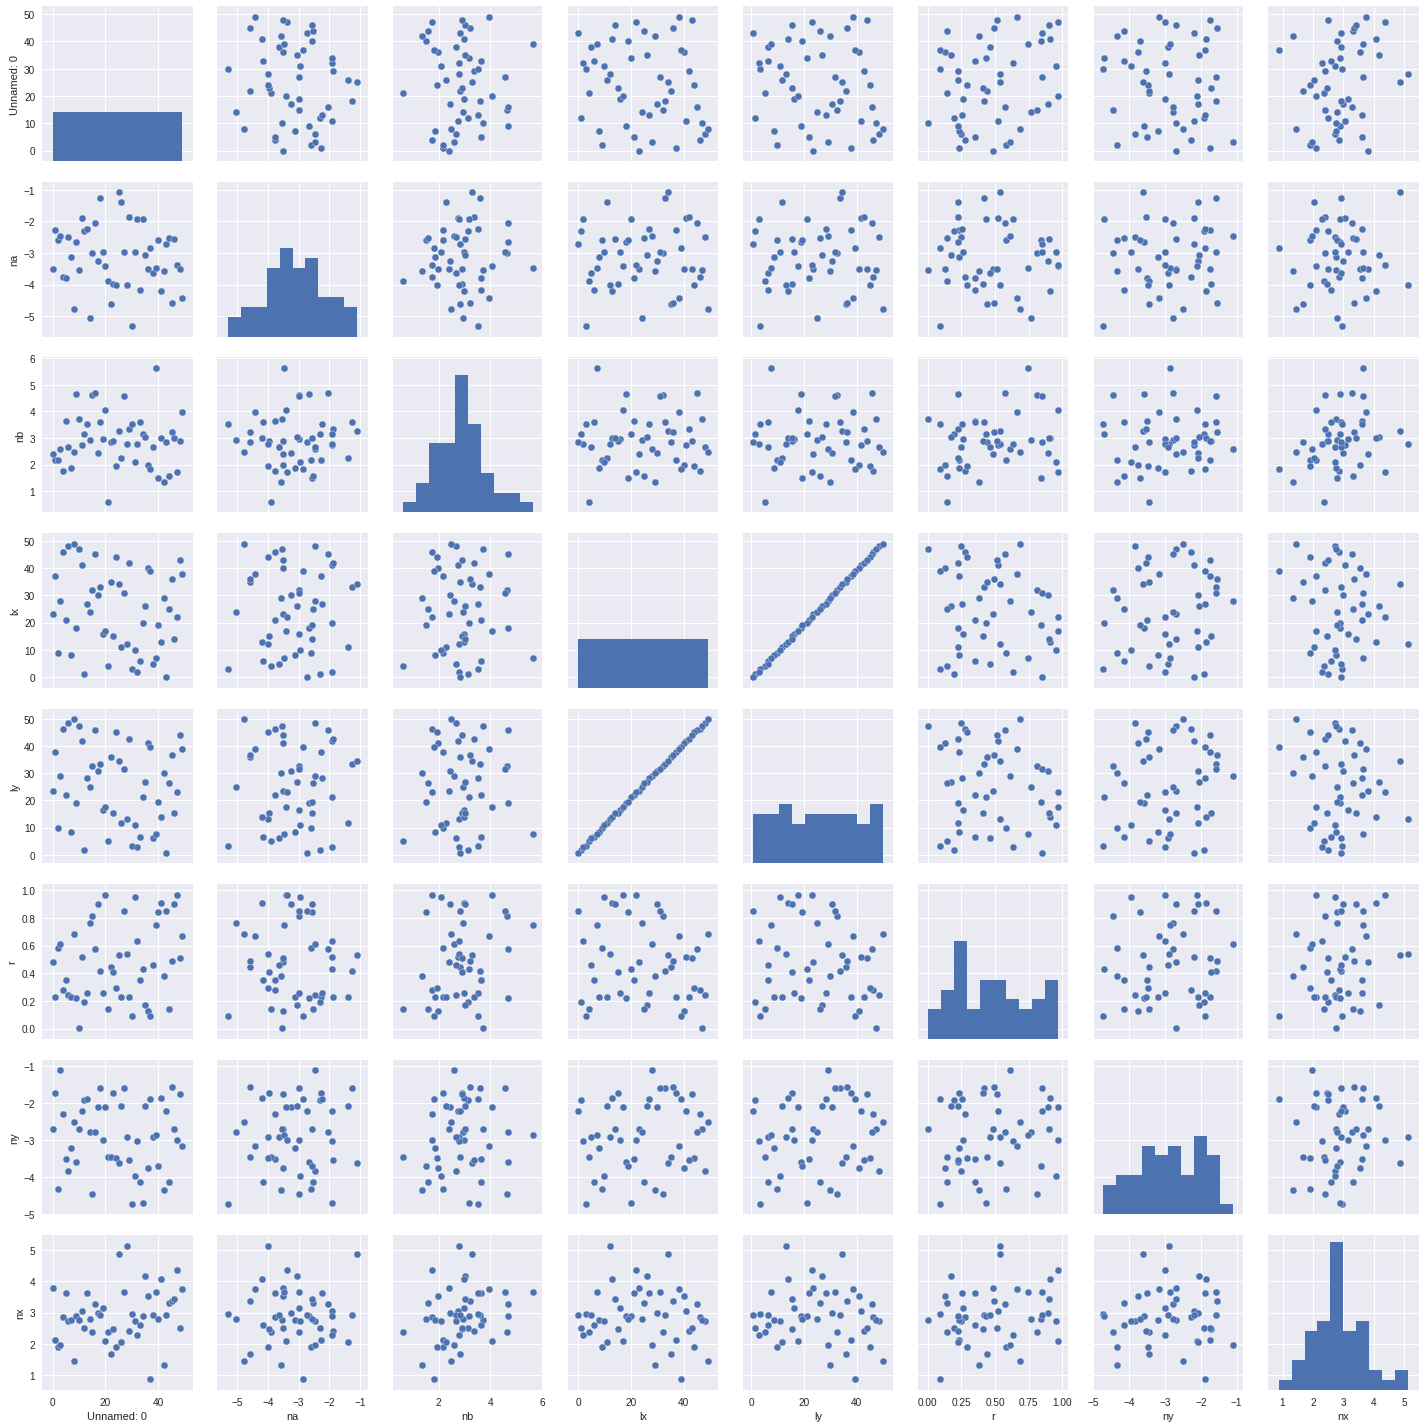

In [118]:
import seaborn as sns

df = pd.read_csv('https://www.dropbox.com/s/ziqwkm163ih96v0/sprint_challenge_data.csv?raw=1')

# Pairplot via seaborn
t = sns.pairplot(df)

# Plot clusters together

You found the clusters. Draw them on the same graph.

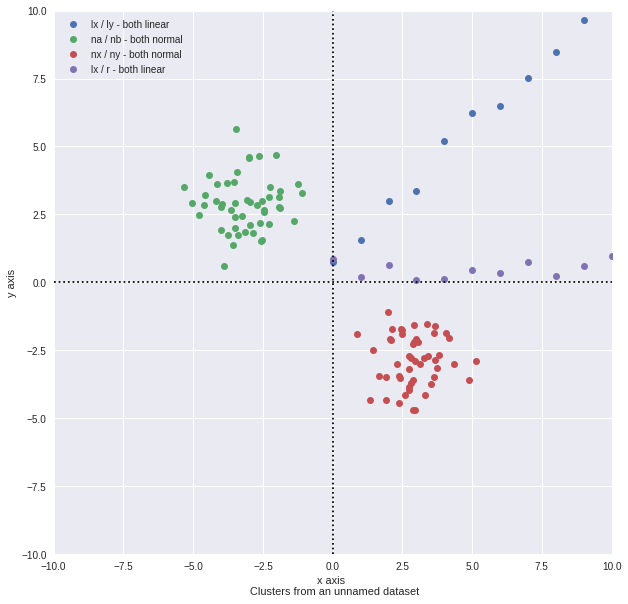

In [121]:
# Plot clusters

plt.figure(figsize=(10,10))

plt.plot(df['lx'],df['ly'],'o',label='lx / ly - both linear')
plt.plot(df['na'],df['nb'],'o',label='na / nb - both normal')
plt.plot(df['nx'],df['ny'],'o',label='nx / ny - both normal')
plt.plot(df['lx'],df['r'],'o',label='lx / r - both linear')
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.xlabel("x axis \n Clusters from an unnamed dataset")
plt.ylabel('y axis')
plt.axhline(ls=':',c='black')
plt.axvline(ls=':',c='black')
plt.legend()
plt.show()

# I chose these groupings because they either showed a correlation in the pairplot
# such as lx / ly, or they showed a normal distribution themselves.
# I paired them to show in different quadrants if possible.
# I think it is interesting that the both lines would 
# separate the scatter plots if extended into the negative x values. 

# I noticed that r plotted with almost any other column would produce a line.